# Overview of the OMNI behavioral dataset

The OMNI behavioral  data are in a csv (comma delimited) file containing one row for every English-Lithuanian word pair shown to each participant. The file includes the timestamps of all event types — study trials, judgment of learning trials (JOLs), and recall trials — along with any behavioral output (e.g., JOLs, accuracy on the recall test).

## Descriptions of the data columns (using the header names included in the csv)

* `delay_group`: the approximate study to recall lag for this participant
    * Note that the exact time between study and test for a particular person should be obtained from the included timestamps.
    * A: immediate recall after end of study and JOL blocks
    * C: 24h study-recall lag
    * E: 48h study-recall lag (n = 1)
    * F: 72h study-recall lag
    * PRISMAF: 72h study-recall lag (study session in MRI)
    * H: 168h study-recall lag
   
   
* `participant_id`: unique identifier for each participant (delay-group + numeric)


* `lith_word_studied`: the lithuanian word in a studied pair


* `eng_word_studied`: the english word in a studied pair


* `studyN_start`: a numeric timestamp in seconds for the start time of study trial N
    * Note that all study events were four seconds duration. 


* `jol_start`: a numeric timestamp in seconds for the start time of the JOL trial


* `recall_trial`: a numeric timestamp in seconds for the start time of the recall trial


* `jol_value`: numeric responses from 0-100 indicating confidence that a given word will be remembered


* `eng_word_response`: the participant's english response for a given recall test trial


* `recall_accuracy`: the participant's recall accuracy


* `study_test_lag`: the time between the 5th study repetition and the recall trial for the given word

## Importing the data 

In [1]:
# Load necessary libraries
import csv
import pandas as pd
import numpy as np
import scipy.stats.stats
import matplotlib.pyplot as plt

In [3]:
# Set the location and name of the datafile to be loaded
data_dir = './'
data_file = 'omni_behav_data_release_April-2-2018.csv'

# Use pandas to read the csv directly into a dataframe
df = pd.read_csv(data_dir + data_file)

# Look at the first few rows of the dataframe
df.head()

,lith_word_studied,eng_word_studied,participant_id,delay_group,study1_start,study2_start,study3_start,study4_start,study5_start,jol_start,recall_start,jol_value,eng_word_response,recall_accuracy,study_test_lag
0,pastatas,building,A1,A,1461597222,1461598097,1461598653,1461599383,1461599951,1461600711,1461601222,100,building,1,21.183333
1,mesa,meat,A1,A,1461597234,1461598070,1461598710,1461599353,1461599975,1461600707,1461601232,100,meat,1,20.950000
2,kreida,chalk,A1,A,1461597248,1461598054,1461598669,1461599403,1461599965,1461600699,1461601238,75,sword,0,21.216667
3,bugnas,drum,A1,A,1461597262,1461598085,1461598683,1461599393,1461599985,1461600719,1461601235,100,drum,1,20.833333
4,muilas,soap,A1,A,1461597274,1461598111,1461598700,1461599369,1461599995,1461600716,1461601249,100,soap,1,20.900000


## Looking at the data

Below are a few basic examples of how to look at and visualize the provided data.

In [4]:
# Look at percent of words correctly recalled by each participant
 
# Get the overall percent correct (number of words correctly recalled / number of recall trials)
# Make a new df that takes the mean of recall_accuracy and study_test_lag, grouping rows (word pairs) 
# by participant_id

df_mean = df[['participant_id', 'recall_accuracy', 'study_test_lag']].groupby(['participant_id']).mean()
df_mean.head()

,recall_accuracy,study_test_lag
participant_id,,
A1,0.644444,19.117407
A10,0.555556,18.594074
A11,0.444444,22.492963
A12,0.955556,13.335556
A13,0.400000,14.812963


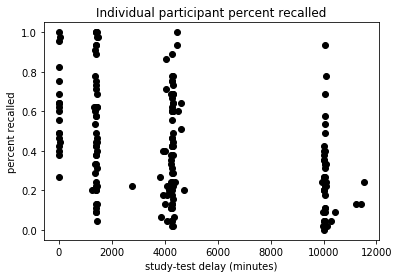

In [5]:
# Plot the percent correct for each participant according to study-test delay
plt.plot(df_mean['study_test_lag'].values, df_mean['recall_accuracy'].values, 'ko')
plt.xlabel('study-test delay (minutes)')
plt.ylabel('percent recalled')
plt.title('Individual participant percent recalled')
plt.show()

In [6]:
# Look at the relationship between JOL ratings given to each word and overall accuracy
# (collapsed across study delay groups)

# Get overall percent correct and average JOL rating for each word 
df_jol = df[['lith_word_studied','delay_group','recall_accuracy','jol_value']].groupby(['lith_word_studied']).mean()
df_jol.head()

,recall_accuracy,jol_value
lith_word_studied,,
akis,0.568421,72.784211
arbata,0.468421,72.000000
batas,0.436842,68.347368
bugnas,0.436842,65.610526
burna,0.478947,72.205263


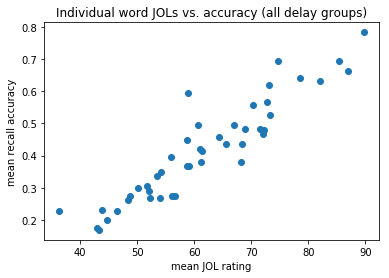

r = 0.93, (p = 0.0000)


In [7]:
# Plot mean JOLs against mean recall accuracy

plt.plot(df_jol['jol_value'],df_jol['recall_accuracy'],'o')
plt.xlabel('mean JOL rating')
plt.ylabel('mean recall accuracy')
plt.title('Individual word JOLs vs. accuracy (all delay groups)')
plt.show()

# Look at the correlation

r,p = scipy.stats.pearsonr(df_jol['jol_value'],df_jol['recall_accuracy'])
print("r = {:0.2f}, (p = {:0.4f})".format(r,p))